# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
books_df = pd.read_csv("../data/Books (1).csv",encoding='latin1')
users_df = pd.read_csv("../data/Users.csv",encoding='latin1')
ratings_df = pd.read_csv("../data/Ratings.csv",encoding='latin1')

# EDA

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print (books_df.shape)
print (users_df.shape)
print (ratings_df.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [7]:
print (books_df.info())
print (users_df.info())
print (ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), obje

In [8]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [9]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [10]:
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [11]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
books_df.duplicated().sum()

0

In [15]:
users_df.duplicated().sum()

0

In [16]:
ratings_df.duplicated().sum()

0

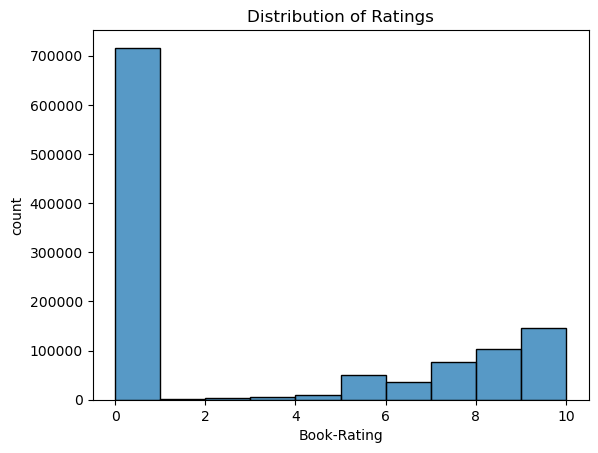

In [18]:
sns.histplot(ratings_df["Book-Rating"],bins=10)
plt.xlabel("Book-Rating")
plt.ylabel("count")
plt.title("Distribution of Ratings")
plt.show()

In [17]:
filtered_ratings_df = ratings_df[ratings_df["Book-Rating"] >= 1]

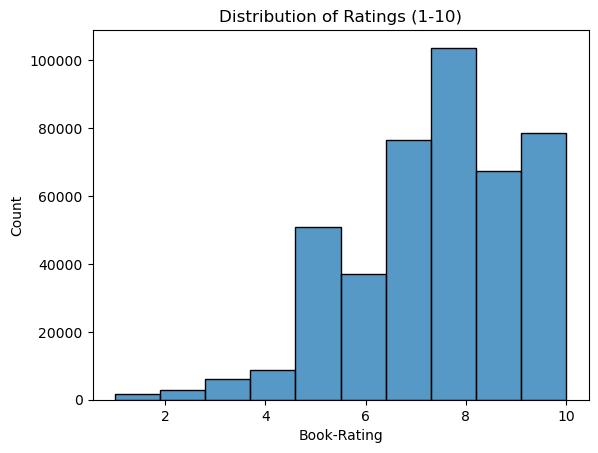

In [7]:
sns.histplot(filtered_ratings_df["Book-Rating"], bins=10)
plt.xlabel("Book-Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings (1-10)")
plt.show()

# Popularity Based Recommendation System

In [18]:
# top rating 50 books
book_ratings = filtered_ratings_df.merge(books_df, on="ISBN").drop(columns=['Image-URL-S','Image-URL-L','ISBN'])
top_books = book_ratings.groupby('Book-Title')['Book-Rating'].agg(['count','mean'])
top_books=top_books.nlargest(50,columns=['count']).sort_values('mean',ascending=False).reset_index()
top_books=top_books.drop(columns='count').to_numpy()

In [19]:
pickle.dump(top_books,open('artifacts/top_50_books.pkl','wb'))

In [20]:
plt.figure(figsize=(10, 12))
plt.barh(top_books_df["Book-Title"], top_books_df["count"], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Book Title')
plt.title('Top 50 Books by Count')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Collaborative Filtering Based Recommender System

In [23]:
#only selecting users who contributed more ratings 
x = book_ratings.groupby('User-ID').count()['Book-Rating']>50 
active_users = x[x].index
print('Unique users : ',len(active_users))

Unique users :  1150


In [24]:
#filtering the data based on active users
filtered_user = book_ratings[book_ratings['User-ID'].isin(active_users)]
filtered_user['User-ID'].nunique()

1150

In [26]:
# selecting the books with more than 50 number of ratings
y=book_ratings.groupby('Book-Title').count()['Book-Rating']>=40
famous_books = y[y].index
print('Unique books : ',len(famous_books))

Unique books :  874


In [27]:
#filtering the data based on famous books
final_ratings = filtered_user[filtered_user['Book-Title'].isin(famous_books)]
final_ratings.drop_duplicates() 
final_ratings.shape

(21943, 7)

# Item based Recommender system (Book)

In [28]:
pivot_table = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot_table.fillna(0,inplace=True)
pivot_table

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3rd Degree,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pivot_table)
similarity_scores

array([[1.        , 0.07808466, 0.02216088, ..., 0.03595438, 0.09145795,
        0.05094141],
       [0.07808466, 1.        , 0.25299758, ..., 0.1389282 , 0.04633673,
        0.13287254],
       [0.02216088, 0.25299758, 1.        , ..., 0.11920192, 0.02837322,
        0.09277545],
       ...,
       [0.03595438, 0.1389282 , 0.11920192, ..., 1.        , 0.03634219,
        0.1668302 ],
       [0.09145795, 0.04633673, 0.02837322, ..., 0.03634219, 1.        ,
        0.02689822],
       [0.05094141, 0.13287254, 0.09277545, ..., 0.1668302 , 0.02689822,
        1.        ]])

In [30]:
similarity_scores.shape

(874, 874)

In [31]:
# getting the index
np.where(pivot_table.index=='Pop Goes the Weasel')

(array([451], dtype=int64),)

In [32]:
#getting top 10 similar books
sorted(list(enumerate(similarity_scores[346])),key=lambda x:x[1],reverse=True)[1:11]

[(11, 0.2056132480364928),
 (868, 0.20286571475041698),
 (467, 0.19544633098013445),
 (364, 0.19431180736022716),
 (369, 0.1926245377448063),
 (83, 0.1855521919349483),
 (394, 0.1853498072792941),
 (734, 0.1849295001279089),
 (36, 0.1698501664917013),
 (101, 0.1662923315597323)]

In [33]:
similarity_data=pd.DataFrame(similarity_scores,index=pivot_table.index)
def recommend_book(book_name):
    similar_items = sorted(list(enumerate(similarity_data.loc[book_name])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar_items:
        print(similarity_data.index[i[0]])

In [34]:
recommend_book("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)


In [35]:
# saving the model
book_data=final_ratings.drop(columns=['User-ID'])
mean_ratings=book_data.groupby('Book-Title')['Book-Rating'].mean().reset_index(name='avg_ratings')
book_data=book_data.drop_duplicates(subset=['Book-Title']).merge(mean_ratings,on='Book-Title').drop('Book-Rating',axis=1)

In [ ]:
pickle.dump(book_data,open('artifacts/book_data.pkl','wb'))
pickle.dump(similarity_data,open('artifacts/similarity_data.pkl','wb'))

# User based Recommender System

In [36]:
pivot = final_ratings.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')

In [37]:
user_similarity=pivot.T.corr()
user_similarity.shape

(1107, 1107)

In [43]:
def recommend_books_by_user(user,n=5):
    temp=user_similarity.drop(index=user)
    similar_users=temp[temp[user]>0.3][user]
    user_watched_movies=pivot.loc[user].dropna().index
    similar_users_watched=pivot.loc[similar_users.index].dropna(axis=1,how='all')
    unwatched=similar_users_watched.drop(columns=user_watched_movies,errors='ignore')
    weighted_score={}
    for i in unwatched:
        cleaned_movie=unwatched[i].dropna()
        scores=np.array([similar_users[j]*cleaned_movie[j] for j in cleaned_movie.index]).mean()
        weighted_score[i]=scores
    return list(dict(sorted(weighted_score.items(),key=lambda x:x[1],reverse=True)).keys())[:n]

In [44]:
recommend_books_by_user(269566,10)

['Flowers for Algernon (Bantam Classic)',
 'Heartbreaker',
 'House of Leaves',
 'Jitterbug Perfume',
 'Nights in Rodanthe',
 "One Flew Over the Cuckoo's Nest",
 'Running with Scissors: A Memoir',
 "Sophie's World: A Novel About the History of Philosophy",
 'Taltos: Lives of the Mayfair Witches',
 'The Bluest Eye']

In [45]:
pickle.dump(pivot,open('artifacts/user_similarity.pkl','wb'))

---------